# Curva de Planck

Este proyecto grafica la distribución de Planck para diferentes temperaturas.

## Instrucciones

1. Asegúrate de tener un compilador Fortran instalado (`gfortran`).
2. Ejecuta las celdas para compilar y ejecutar el código Fortran.
3. El programa generará archivos CSV que serán cargados y graficados a continuación.

In [1]:
%%capture
%sudo apt install -y gfortran
%gfortran --version
%pip install pandas matplotlib

Ahora, toca compilar y ejecutar el código:

In [2]:
import subprocess
import os

# Configuración
fortran_file = 'main.f95'
executable = 'a.out'

# Compilar el código Fortran
try:
    print("Compilando el código Fortran...")
    subprocess.run(['gfortran', fortran_file, '-o', executable], check=True)
    print("Compilación exitosa.")
except subprocess.CalledProcessError as e:
    print("Error durante la compilación:")
    print(e)
    raise

if os.name != 'nt':
    os.chmod(executable, 0o755)

if os.path.exists(executable):
    try:
        print("Ejecutando el programa Fortran...")
        subprocess.run(['./' + executable], check=True)
        print("Ejecutación exitosa. Archivos CSV generados.")
    except subprocess.CalledProcessError as e:
        print("Error durante la ejecución:")
        print(e)
        raise
else:
    print(f"El ejecutable {executable} no se encontró.")

Compilando el código Fortran...
Compilación exitosa.
Ejecutando el programa Fortran...
Ejecutación exitosa. Archivos CSV generados.


Finalmente, procedemos a importar paquetes necesarios y establecemos la configuración de temperaturas y el nombre de los archivos CSV.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Configuración
temperaturas = [2000, 6000, 10000, 14000]
nombre_base = 'curvaDePlanck'
datos = {}

Cargamos ahora los datos:

In [4]:
# Cargar datos desde los archivos CSV
for temp in temperaturas:
    archivo = f"{nombre_base}_{temp}.csv"
    if os.path.exists(archivo):
        try:
            datos[temp] = pd.read_csv(archivo)
        except pd.errors.EmptyDataError:
            print(f"Archivo {archivo} está vacío.")
        except Exception as e:
            print(f"Error al leer {archivo}: {e}")
    else:
        print(f"Archivo {archivo} no encontrado.")

Finalmente, graficamos las curvas de Planck.

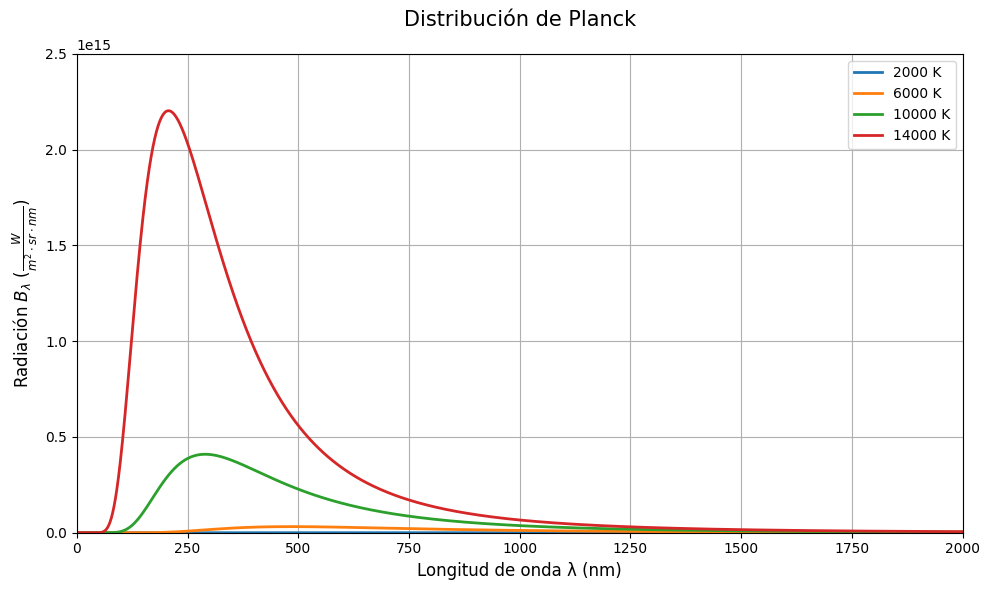

In [5]:
plt.figure(figsize=(10, 6))
for temp, df in datos.items():
    plt.plot(df['x'], df['y'], linewidth=2, label=f"{temp} K")

plt.title("Distribución de Planck", fontsize=15, pad=20)
plt.xlabel("Longitud de onda λ (nm)", fontsize=12)
plt.ylabel(r"Radiación $B_\lambda$ $(\frac{W}{m^2 \cdot sr \cdot nm})$", fontsize=12)
plt.xlim(0, 2000)
plt.ylim(0, 2.5e15)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()